## Marketing Email Campaign Analysis

### Overall Objective

We want to build a model to predict CTR and optimize email campaign performance. Test how much improvement that it.

Specifically we want to achieve the following :
* Answer what percentage of users opened the email vs. clicked on the link in the email?
* Build a model to optimize in the future email campaigns to maximize the probability of users clicking on the link in the email
* Answer: By how much the model would improve CTR (click through rate)? How would you test that?
* Any interesting findings regarding pattern in how the email campaign performed for different segments of users?

### Summary of Findings
Percentage Open vs. Percentage Click:
* Based on the data 10.35% of users would open the eamil
* Based on the data 2.12% of users would click the email 

<br>

Findings regarding email campaign performance for different user segments:
* Click Through Rate is almost 3 times as higher in UK and US as those in ES or FR. There might be a translation issue.
* When user has <15 past purchases, the CTR increases as past purchases increases; 
    Then it decreases as past purchases increase from 15 - 19; Then it jumps significantly again when past purchases >19
* Personalied emails are more likely to be opened and clikced
* Emails sent on the weekends are less likely to be opened and clicked
* Emails sent closer to noon (9am to 12pm) and later in the night (10pm to 12am) have a higher CTR

<br>

Predictive Model:
I have built a Random Forest with Random Seach Cross Validation for optimization to predict whether a user would click the link or not.

<br>

Features of higher importance from the model are:
* user_past_purchases
* hour of the day
* day of the week 
* whether the email is personalized 
* whether the email is short or long

<br>

Ideally, the new email campaign strategy is to send emails only to users whom the model will predict to click the link. To be more specific, emails should be:
* Personalized
* Short and concise
* Sent around noon time or after dinner time 
* Sent on weekdays
* Sent to users with more past purchases (In the case of capturing maximum CTR we may want to send to all users as long as we satisfy the 4 criteria above)

<br>

Model Performance, CTR Improvement & Testing:
* Based on precision score, out of all the users the model preidcts to click the link, 4.29% will actually click. This doubles the orginal CTR.
* To test the difference, I would conduct an AB Test. (Details omitted)

#### Loading libraries and packages

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os 
import textwrap
import sys
import jupyterthemes
from jupyterthemes import jtplot
jtplot.style(theme= 'monokai', context = 'notebook', ticks = True, grid = True)
%matplotlib inline


#### Preparing Data 

In [3]:
email = pd.read_csv('email_table.csv')

In [20]:
open_id = pd.read_csv('email_opened_table.csv')
click_id = pd.read_csv('link_clicked_table.csv')

In [5]:
# Make sure we import the data right
email.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases
0,85120,short_email,personalized,2,Sunday,US,5
1,966622,long_email,personalized,12,Sunday,UK,2
2,777221,long_email,personalized,11,Wednesday,US,2
3,493711,short_email,generic,6,Monday,UK,1
4,106887,long_email,generic,14,Monday,US,6


In [10]:
email.isnull().sum()

email_id               0
email_text             0
email_version          0
hour                   0
weekday                0
user_country           0
user_past_purchases    0
dtype: int64

In [8]:
open_id.head()

,email_id
0,284534
1,609056
2,220820
3,905936
4,164034


In [9]:
click_id.head()

,email_id
0,609056
1,870980
2,935124
3,158501
4,177561


In [21]:
# append a column as a binary label
open_id['open'] = 1
click_id['click'] = 1

In [22]:
# Join the tables
temp = email.merge(open_id, how = 'left', on = 'email_id').fillna(0)
df = temp.merge(click_id, how = 'left', on = 'email_id').fillna(0)

In [23]:
df.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,open,click
0,85120,short_email,personalized,2,Sunday,US,5,0.0,0.0
1,966622,long_email,personalized,12,Sunday,UK,2,1.0,1.0
2,777221,long_email,personalized,11,Wednesday,US,2,0.0,0.0
3,493711,short_email,generic,6,Monday,UK,1,0.0,0.0
4,106887,long_email,generic,14,Monday,US,6,0.0,0.0


In [28]:
df.dtypes

email_id                  int64
email_text               object
email_version            object
hour                      int64
weekday                  object
user_country             object
user_past_purchases       int64
open                   category
click                  category
dtype: object

In [27]:
df['open'] = df['open'].astype('category')
df['click'] = df['click'].astype('category')

In [75]:
df.shape

(100000, 9)

#### Calculate percentage open and percentage click

In [33]:
print('Percentage of Users Open Email')
print('-' * 40) 
print(df['open'].value_counts(normalize = True) * 100)

Percentage of Users Open Email
----------------------------------------
0.0    89.655
1.0    10.345
Name: open, dtype: float64


In [34]:
print('Percentage of Users Click Link')
print('-' * 40) 
print(df['click'].value_counts(normalize = True) * 100)

Percentage of Users CLick Link
----------------------------------------
0.0    97.881
1.0     2.119
Name: click, dtype: float64


#### Exploratory Analysis

By Email Text

In [38]:
print('Percentage of Users Click Link by Email Text')
print('-' * 40) 
df.groupby('email_text')['click'].value_counts(normalize = True).unstack() * 100

Percentage of Users CLick Link by Email Text
----------------------------------------


click,0.0,1.0
email_text,,
long_email,98.146233,1.853767
short_email,97.612823,2.387177


In [133]:
table = df.groupby('email_text')['click'].value_counts(normalize = True).unstack() * 100
table['total'] = df.groupby('email_text').count().iloc[:,0]

In [134]:
table

click,0.0,1.0,total
email_text,,,
long_email,98.146233,1.853767,50276
short_email,97.612823,2.387177,49724


BY Email Version

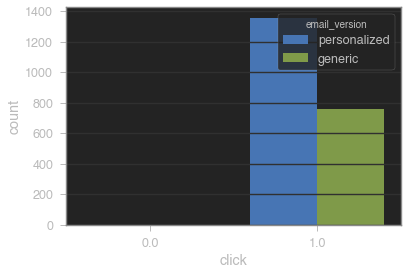

In [60]:
sns.countplot(df[df['click'] == 1]['click'], hue = df[df['click'] == 1]['email_version'])

Hourly Trend

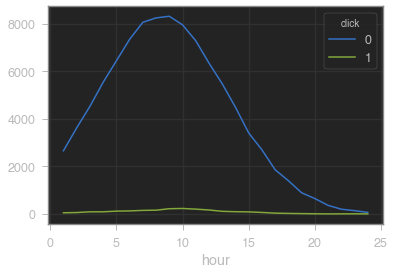

In [234]:
df.groupby('hour')['click'].value_counts().unstack().plot()

In [137]:
print('Percentage of Users Click Link by Hour')
print('-' * 40) 
df.groupby('hour')['click'].value_counts(normalize = True).unstack() * 100


Percentage of Users Click Link by Hour
----------------------------------------


click,0.0,1.0
hour,,
1,98.187199,1.812801
2,98.367791,1.632209
3,98.047722,1.952278
4,98.381359,1.618641
5,98.198748,1.801252
6,98.285332,1.714668
7,98.171624,1.828376
8,98.106692,1.893308
9,97.420565,2.579435


Text(0, 0.5, 'CTR')

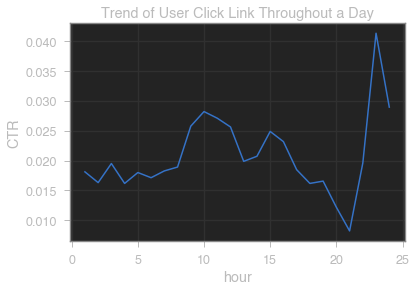

In [57]:
df.groupby('hour')['click'].value_counts(normalize = True).unstack().iloc[:,1].plot()
plt.title('Trend of User Click Link Throughout a Day')
plt.ylabel('CTR')

BY Past Purchase

Text(0, 0.5, 'CTR')

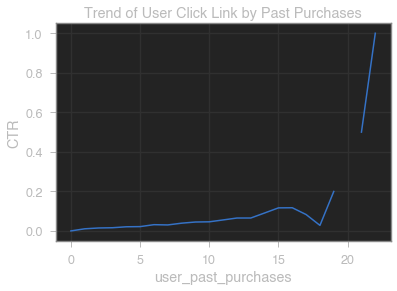

In [61]:
df.groupby('user_past_purchases')['click'].value_counts(normalize = True).unstack().iloc[:,1].plot()
plt.title('Trend of User Click Link by Past Purchases')
plt.ylabel('CTR')

Weekly Trend

In [65]:
cleanup_weekday = {'weekday': {'Sunday': 0, 'Monday': 1, 'Tuesday': 2,
                               'Wednesday': 3, 'Thursday': 4, 'Friday': 5,
                                'Saturday': 6}
                    }

In [66]:
df.replace(cleanup_weekday, inplace = True)

In [67]:
df.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,open,click
0,85120,short_email,personalized,2,0,US,5,0.0,0.0
1,966622,long_email,personalized,12,0,UK,2,1.0,1.0
2,777221,long_email,personalized,11,3,US,2,0.0,0.0
3,493711,short_email,generic,6,1,UK,1,0.0,0.0
4,106887,long_email,generic,14,1,US,6,0.0,0.0


Text(0, 0.5, 'CTR')

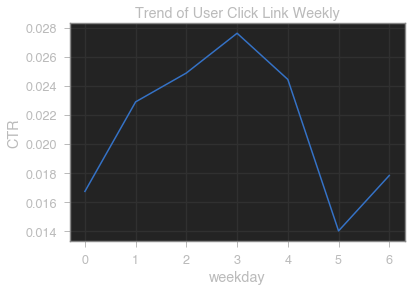

In [68]:
df.groupby('weekday')['click'].value_counts(normalize = True).unstack().iloc[:,1].plot()
plt.title('Trend of User Click Link Weekly')
plt.ylabel('CTR')

By Country

In [71]:
df.groupby('user_country')['click'].value_counts(normalize = True).unstack().iloc[:,1]

user_country
ES    0.008327
FR    0.008004
UK    0.024675
US    0.024360
Name: 1.0, dtype: float64

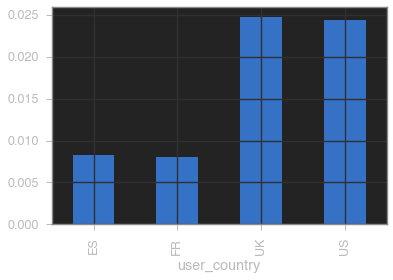

In [135]:
df.groupby('user_country')['click'].value_counts(normalize = True).unstack().iloc[:,1].plot(kind = 'bar')

#### Findings From User Segmentation 
* Click Through Rate is almost 3 times as higher in UK and US as those in ES or FR. There might be a translation issue.
* When user has <15 past purchases, the CTR increases as past purchases increases; 
    Then it decreases as past purchases increase from 15 - 19; Then it jumps significantly again when past purchases >19
* Personalied emails are more likely to be opened and clikced
* Emails sent on the weekends are less likely to be opened and clicked
* Emails sent closer to noon (9am to 12pm) and later in the night (10pm to 12am) have a higher CTR

#### Building Random Forest Model

Feature Engineering

In [77]:
df.dtypes

email_id                  int64
email_text               object
email_version            object
hour                      int64
weekday                   int64
user_country             object
user_past_purchases       int64
open                   category
click                  category
dtype: object

In [78]:
df['hour'] = df['hour'].astype('category')
df['weekday'] = df['weekday'].astype('category')

In [79]:
# Get dummies for categorical variables

cat_feats = ['email_text', 'email_version', 'user_country']

In [81]:
final_data = pd.get_dummies(df, columns = cat_feats, drop_first = True)

In [82]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   email_id                    100000 non-null  int64   
 1   hour                        100000 non-null  category
 2   weekday                     100000 non-null  category
 3   user_past_purchases         100000 non-null  int64   
 4   open                        100000 non-null  category
 5   click                       100000 non-null  category
 6   email_text_short_email      100000 non-null  uint8   
 7   email_version_personalized  100000 non-null  uint8   
 8   user_country_FR             100000 non-null  uint8   
 9   user_country_UK             100000 non-null  uint8   
 10  user_country_US             100000 non-null  uint8   
dtypes: category(4), int64(2), uint8(5)
memory usage: 5.6 MB


In [89]:
final_data.head()

,email_id,hour,weekday,user_past_purchases,open,click,email_text_short_email,email_version_personalized,user_country_FR,user_country_UK,user_country_US
0,85120,2,0,5,0.0,0.0,1,1,0,0,1
1,966622,12,0,2,1.0,1.0,0,1,0,1,0
2,777221,11,3,2,0.0,0.0,0,1,0,0,1
3,493711,6,1,1,0.0,0.0,1,0,0,1,0
4,106887,14,1,6,0.0,0.0,0,0,0,0,1


In [92]:
# Train Test Split

from sklearn.model_selection import train_test_split

x = final_data.drop(['email_id','open','click'], axis = 1)
y = final_data['click']
x_train, x_test, y_train, y_test = train_test_split(
     x, y, test_size=0.3, random_state = 101)

In [84]:
# Train the first base random forest model

from sklearn.ensemble import RandomForestClassifier

In [109]:
rfc = RandomForestClassifier(n_estimators= 200, random_state = 42)

In [110]:
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

#### Prediction and Evaluation

In [87]:
from sklearn.metrics import confusion_matrix, classification_report

In [111]:
# Evaluate prediction

rfc_pred = rfc.predict(x_test)

print('Confusion Matrix: \n')
print(confusion_matrix(y_test, rfc_pred))
print('\n')
print('Classification Report: \n')
print(classification_report(y_test, rfc_pred))

Confusion Matrix: 

[[29248    94]
 [  654     4]]


Classification Report: 

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     29342
         1.0       0.04      0.01      0.01       658

    accuracy                           0.98     30000
   macro avg       0.51      0.50      0.50     30000
weighted avg       0.96      0.98      0.97     30000



In [100]:
# Explore what features are important in classification

features = list(x_train.columns)

In [104]:
importance = sorted(zip(features, rfc.feature_importances_), key=lambda x:x[1], reverse=True)
for feature, val in importance:
    print('{0:30s} | {1:.5f}'.format(feature, val))

hour                           | 0.41102
user_past_purchases            | 0.33270
weekday                        | 0.18788
email_text_short_email         | 0.02535
email_version_personalized     | 0.01636
user_country_UK                | 0.01134
user_country_US                | 0.00997
user_country_FR                | 0.00536


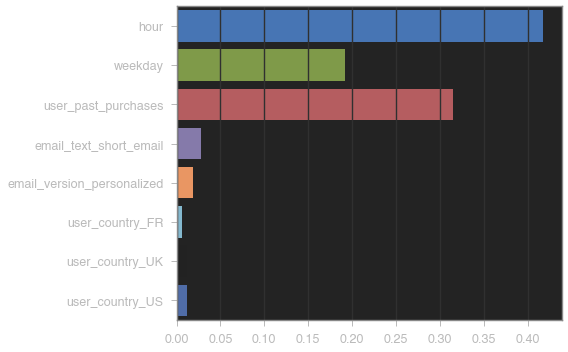

In [153]:
plt.subplots(figsize=(8, 5))
importances = list(rfc.feature_importances_)

sns.barplot(y = features, x = importances)
plt.tight_layout()

#### RandomSearch Cross Validation to Improve the Model

In [106]:
from pprint import pprint

In [112]:
print('Parameters currently in use:\n')
pprint(rfc.get_params())


Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [121]:
# Random Search

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 10)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               }
pprint(random_grid)

{'max_depth': [10, 35, 60, 85, 110, None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50, 266, 483, 700, 916, 1133, 1350, 1566, 1783, 2000]}


In [122]:
# Use the random grid to search for best hyperparameters

from sklearn.model_selection import RandomizedSearchCV

# First create the base model to tune
rfc1 = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rfc1_random = RandomizedSearchCV(estimator = rfc1, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rfc1_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 26.5min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 35, 60, 85, 110,
                                                      None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 266, 483, 700, 916,
                                                         1133, 1350, 1566, 1783,
                                                         2000]},
                   random_state=42, verbose=2)

In [123]:
# Evaluate the model with best hyperparameters

rfc_pred1 = rfc1_random.best_estimator_.predict(x_test)



print('Confusion Matrix: \n')
print(confusion_matrix(y_test, rfc_pred1))
print('\n')
print('Classification Report: \n')
print(classification_report(y_test, rfc_pred1))

Confusion Matrix: 

[[29342     0]
 [  658     0]]


Classification Report: 

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     29342
         1.0       0.00      0.00      0.00       658

    accuracy                           0.98     30000
   macro avg       0.49      0.50      0.49     30000
weighted avg       0.96      0.98      0.97     30000



/Users/henryxu/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Plot ROC Curve to evaluate model performance

In [174]:
# Plot for the orginal random forest model

from sklearn.metrics import roc_curve, auc

probs = rfc.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

Text(0.5, 0, 'False Positive Rate')

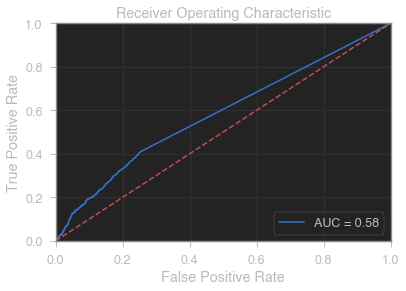

In [175]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
# Plot for the random forest model with Random Search CV

In [177]:
probs = rfc1_random.best_estimator_.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

Text(0.5, 0, 'False Positive Rate')

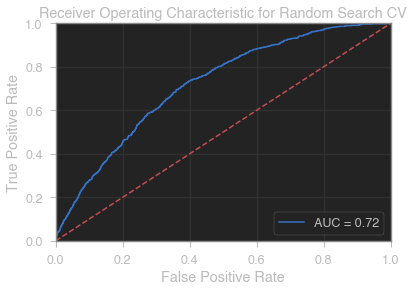

In [178]:
plt.title('Receiver Operating Characteristic for Random Search CV')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

#### Select Best Prbablity Threshold for Random Search CV RF 

since the data is highly imbalanced (positive examples is only 2% of the total examples), if using default probability threshold (0.5), the model just classify every example as negative, so we need to plot the ROC curve and choose a better probability threshold.

according to above ROC curve and make a compromise between Precision and Recall, I decide to choose a threshold which makes TPR at about 0.6, then FPR will be about 0.3, which I think is acceptable.


In [181]:
d = {}
d['FPR'],d['TPR'],d['Threshold'] = fpr, tpr, threshold
d = pd.DataFrame(d)

In [183]:
d.loc[(d['TPR'] > 0.6) & (d['TPR'] < 0.61),:]

,FPR,TPR,Threshold
2907,0.294424,0.600304,0.024640
2908,0.294561,0.600304,0.024634
2909,0.294595,0.600304,0.024626
2910,0.294765,0.600304,0.024625
2911,0.294833,0.600304,0.024619
...,...,...,...
3008,0.305978,0.609422,0.024053
3009,0.306046,0.609422,0.024041
3010,0.306114,0.609422,0.024019
3011,0.306319,0.609422,0.024014


In [194]:
# choose a threshold based on ROC
# Threshold=0.024
pos_prob_threshold = 0.024

def adjust_predict(x):
    y_probas = rfc1_random.best_estimator_.predict_proba(x)
    return (y_probas[:,1] > pos_prob_threshold).astype(int)

In [195]:
y_pred = adjust_predict(x_test)

In [197]:
print('Confusion Matrix: \n')
print(confusion_matrix(y_test, y_pred))
print('\n')
print('Classification Report: \n')
print(classification_report(y_test, y_pred))b

Confusion Matrix: 

[[20343  8999]
 [  255   403]]


Classification Report: 

              precision    recall  f1-score   support

           0       0.99      0.69      0.81     29342
           1       0.04      0.61      0.08       658

    accuracy                           0.69     30000
   macro avg       0.52      0.65      0.45     30000
weighted avg       0.97      0.69      0.80     30000



In [209]:
# Print out more accurate precision score and recall score

from sklearn.metrics import precision_score, recall_score

print ("test precision: {:.2f}%".format(precision_score(y_test,y_pred) * 100))
print ("test recall: {:.2f}%".format(recall_score(y_test,y_pred) * 100))

test precision: 4.29%
test recall: 61.25%


The model is significantly better in terms of both precision and recall.

In [206]:
# Explore what features are important in classification for the Random Srach CV RF Model

features = list(x_train.columns)

In [207]:
importance1 = sorted(zip(features, rfc1_random.best_estimator_.feature_importances_), key=lambda x:x[1], reverse=True)
for feature, val in importance1:
    print('{0:30s} | {1:.5f}'.format(feature, val))

user_past_purchases            | 0.43115
hour                           | 0.26982
weekday                        | 0.15410
email_version_personalized     | 0.04660
email_text_short_email         | 0.03551
user_country_US                | 0.02509
user_country_UK                | 0.02377
user_country_FR                | 0.01395


We can see that the most important feature has changed to user_past_purchases

### Answer VP of Marketing's Inquiries
See "Summary of Findings" at the top